In [10]:
#step 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#step 2
df = pd.read_csv('clean_data.csv', delimiter = ',')
df.head()

,id,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


In [3]:
#step 3
missing_values = df.isna()
missing_counts = missing_values.sum()
print(missing_counts)

df.drop('location', axis=1, inplace=True)
df.drop('url', axis=1, inplace=True)

df.head()

id                          0
screen_name                 0
location                  963
description               387
url                      1347
followers_count             0
friends_count               0
listed_count                0
created_at                  0
favourites_count            0
verified                    0
statuses_count              0
lang                        0
status                    325
default_profile             0
default_profile_image       0
name                        0
bot                         0
dtype: int64


,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


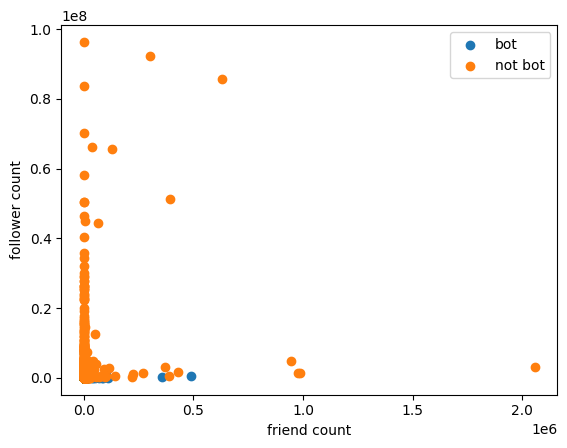

In [4]:
#step 4
df_bot = df[df.bot == 1]

x = np.array(df_bot['friends_count'])
y = np.array(df_bot['followers_count'])

plt.scatter(x,y,label='bot')

df_not_bot = df[df.bot == 0]

x = np.array(df_not_bot['friends_count'])
y = np.array(df_not_bot['followers_count'])

plt.scatter(x,y,label='not bot')

#label x and y axis
plt.xlabel('friend count')
plt.ylabel('follower count')

#limit x and y axis
#plt.xlim(-100, 50000)
#plt.ylim(-100, 50000)

#show plot and legend
plt.legend()
plt.show()

In [5]:
#step 5

Bag_of_words = ['bot', 'follow me', 'free', 'fake', 'virus', 'troll', 'clone', 'tweet me']


#detect any of above strings in column of df and create new column
df['screen_name_binary'] = [any(word.lower() in screen_name.lower() for word in Bag_of_words) for screen_name in df['screen_name']]
df['name_binary'] = [any(word.lower() in name.lower() for word in Bag_of_words) for name in df['name']]
df['description_binary'] = [any(word.lower() in str(description) for word in Bag_of_words) for description in df['description']]
df['status_binary'] = [any(word.lower() in str(status) for word in Bag_of_words) for status in df['status']]

df.head()

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot,screen_name_binary,name_binary,description_binary,status_binary
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1,False,False,False,False
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1,False,False,False,False
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1,True,True,True,True
3,3.063139e+09,sc_papers,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1,False,False,False,False
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1,False,False,False,False


In [14]:
#step 6

#create attribute set
subset = ['friends_count', 'followers_count', 'screen_name_binary', 'name_binary', 'status_binary', 'verified', 'statuses_count']
X = df[subset]
y = df.bot

#split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('accuracy:' , accuracy_score(y_test, y_pred))



accuracy: 0.8466334164588528


In [7]:
# 
# 1) Based on the plot in step 4 part 1, can you determine if friends_count and followers_count can be used for classification? 
# Is there a pattern? 
# Consider zooming in on the plot to get a better picture.

# 2) What was the training accuracy? What was the testing accuracy? Based on this
# can you conclude that the decision tree is a good Machine Learning model for
# your dataset?

# 3) What percentage of the training and test data are bots? If you had a different
# dataset where only 10% of the rows were bots, would 85% accuracy be good?


# 4) When you split the data into train and test in Step 6, you might have assigned the
# first 70% of the data to the training data and the last 30% of the data as test data.
# Can you see any problems with doing this? Can you think of any better
# alternatives?

# 5) The Decision Tree Classifier learned this data set quite effectively. Can you give
# an example of a classification task for which decision tree would perform poorly?

# 6) Often in data science you are just given a data set and a task (e.g., learn a
# classifier for detecting bots). The instructions in the assignment made a lot of
# decisions for you. List 5 examples of these decisions that the assignment made
# for you. (In other words, if you were trying to solve this problem without this
# homework guiding you, what would you have to decide yourself in processing
# your data and designing your classifier?)
# 